<a href="https://colab.research.google.com/github/cqkh42/practical-deep-learning-for-coders/blob/main/projects/keir_vs_boris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install -Uqq fastbook
!pip install -Uqq jmd_imagescraper

In [16]:
import shutil
from pathlib import Path

import fastai.vision.all as vision
import fastai.vision.widgets as vision_widgets
import jmd_imagescraper.core as imagescraper
import requests

In [17]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [18]:
# first things first is to get some data once from the internet
# then write it to a gz in drive

# then each time forwards we read from g-drive
# fit our model
# clean the data
# zip it back up and send to g-drive

In [19]:
TARRED_DATA = Path() / 'gdrive' / 'MyDrive' / 'colab' / 'images.tar.gz'

In [20]:
import tempfile
if not TARRED_DATA.exists():
    with tempfile.TemporaryDirectory() as tmpdirname:
        print('created temporary directory', tmpdirname)
        p = Path(tmpdirname) / 'images'
        p.mkdir()
        for category in ['boris johnson', 'keir starmer']:
            imagescraper.duckduckgo_search(
                p, category, category, max_results=1000, 
                img_layout=imagescraper.ImgLayout.All
            )
        !tar --directory=$tmpdirname -czf $TARRED_DATA images/

created temporary directory /tmp/tmp52j4cveh
Duckduckgo search: boris johnson


Exception occured while retrieving https://tse1.mm.bing.net/th?id=OIP.FXNEBS7Bk5uJR3lezRnjrwHaHZ&pid=Api
Exception occured while retrieving https://tse4.mm.bing.net/th?id=OIP.33Ll6Gnpn1Lqpj9ZyXXFvwHaE7&pid=Api
Duckduckgo search: keir starmer


In [79]:
!rm -rf images/
!tar -xzf $TARRED_DATA
IMAGES = Path() / 'images'
len(list(IMAGES.rglob('*')))

2796

In [80]:
vehicles = vision.DataBlock(
    blocks=(vision.ImageBlock, vision.CategoryBlock), 
    get_items=vision.get_image_files, 
    splitter=vision.RandomSplitter(valid_pct=0.2, seed=42),
    get_y=vision.parent_label,
    item_tfms=vision.RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=vision.aug_transforms()
)

In [81]:
dls = vehicles.dataloaders(IMAGES)

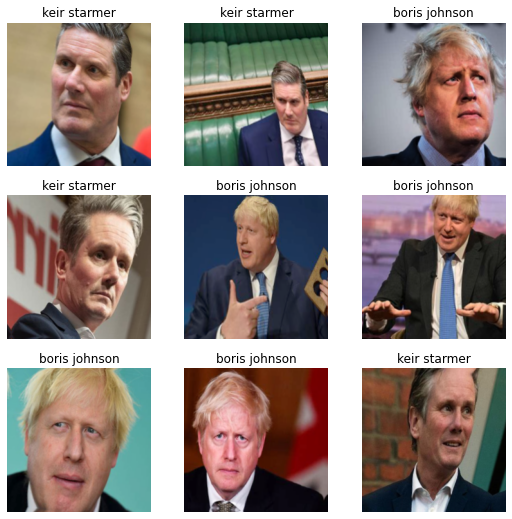

In [82]:
dls.train.show_batch()

In [83]:
learn = vision.cnn_learner(dls, vision.resnet18, metrics=vision.error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.425974,0.378081,0.114695,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.088735,0.346626,0.103943,00:15
1,0.053137,0.421166,0.102151,00:15
2,0.043870,0.641123,0.139785,00:15
3,0.043758,0.583698,0.137993,00:15


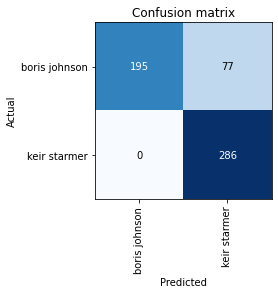

In [84]:
interp = vision.ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

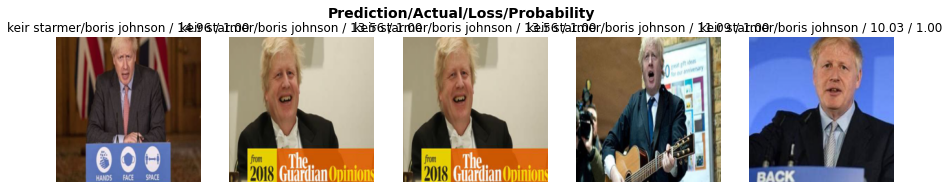

In [85]:
interp.plot_top_losses(5, nrows=1)

In [86]:
cleaner = vision_widgets.ImageClassifierCleaner(learn)
cleaner

In [75]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), IMAGES/cat)

In [76]:
len(list(IMAGES.rglob('*')))

2796

In [77]:
!tar -czf $TARRED_DATA images/

In [78]:
len(list(IMAGES.rglob('*')))

2796

In [ ]:
learn.export()

In [ ]:
(Path() / 'export.pkl').stat()

os.stat_result(st_mode=33188, st_ino=1724579, st_dev=49, st_nlink=1, st_uid=0, st_gid=0, st_size=46983294, st_atime=1613727993, st_mtime=1613727993, st_ctime=1613727993)